0


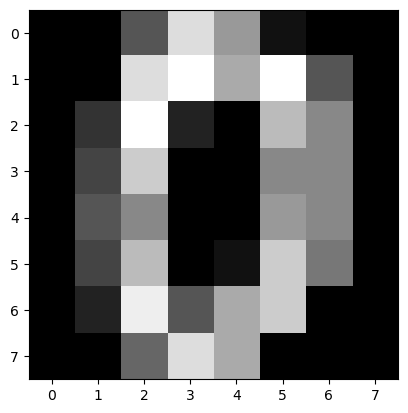

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from nn import NeuralNetwork

digits = datasets.load_digits()
X = digits.data
y = digits.target  # Not used in autoencoder training but might be useful for other analyses

plt.imshow(np.reshape(X[0],(8,8)),cmap='gray')
print(y[0])

In [2]:

# Load dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Normalize X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # One-hot encode y if necessary for your setup
encoder = OneHotEncoder()
y_one_hot = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=36)

# Define the neural network architecture
nn_arch = [
    {'input_dim': 64, 'output_dim': 32, 'activation': 'relu'},
    {'input_dim': 32, 'output_dim': 10, 'activation': 'sigmoid'}  # Assuming a sigmoid output layer for multi-class classification
]

# Instantiate the neural network
nn = NeuralNetwork(nn_arch, lr=0.05, seed=57, batch_size=32, epochs=3000, loss_function='binary_cross_entropy')

# Train the neural network
train_loss, val_loss = nn.fit(X_train.T, y_train.T, X_val.T, y_val.T)  # Note: .T is used to transpose the matrices to match the expected shape

# Predictions (Optional: evaluate the model's performance)
y_hat_val = nn.predict(X_val.T)
y_pred_labels = np.argmax(y_hat_val, axis=0)

Epoch 1/3000, Training Loss: 7.33390596627105, Validation Loss: 6.903402395714587
Epoch 2/3000, Training Loss: 6.9096076988511745, Validation Loss: 6.5276212748900955
Epoch 3/3000, Training Loss: 6.532874315246395, Validation Loss: 6.190292307776067
Epoch 4/3000, Training Loss: 6.194705162788329, Validation Loss: 5.884754773701103
Epoch 5/3000, Training Loss: 5.888420545713339, Validation Loss: 5.606385959716598
Epoch 6/3000, Training Loss: 5.609355199492243, Validation Loss: 5.351958932900445
Epoch 7/3000, Training Loss: 5.354168271148017, Validation Loss: 5.118640127701027
Epoch 8/3000, Training Loss: 5.1202660631111705, Validation Loss: 4.904327117674652
Epoch 9/3000, Training Loss: 4.9052555045393875, Validation Loss: 4.707250529067988
Epoch 10/3000, Training Loss: 4.707312138252911, Validation Loss: 4.525904009019242
Epoch 11/3000, Training Loss: 4.524945511857429, Validation Loss: 4.358997199472926
Epoch 12/3000, Training Loss: 4.356899117837812, Validation Loss: 4.20527920037421

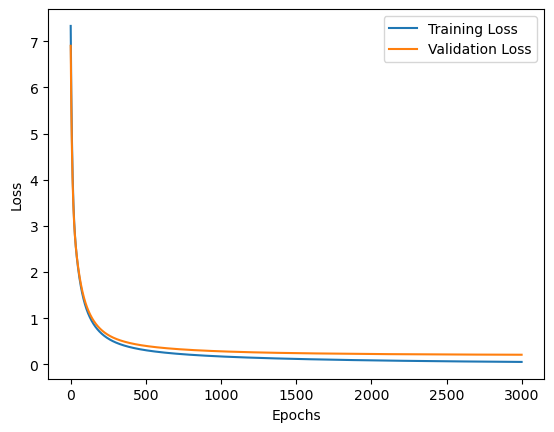

In [3]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()





In [6]:
y_train.shape


(1437, 10)

In [7]:
X_train.shape


(1437, 64)